In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
init_notebook_mode(connected=True) 

data = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv', delimiter = ',')
#normalmente se limita el numero de elementos que se imprimen de un array pero podemos cambiarlo con numpy para mostrarlos todos
columns= np.array(data.columns)
with np.printoptions(threshold=np.inf):
    print(columns)

['gameid' 'datacompleteness' 'url' 'league' 'year' 'split' 'playoffs'
 'date' 'game' 'patch' 'participantid' 'side' 'position' 'playername'
 'playerid' 'teamname' 'teamid' 'champion' 'ban1' 'ban2' 'ban3' 'ban4'
 'ban5' 'pick1' 'pick2' 'pick3' 'pick4' 'pick5' 'gamelength' 'result'
 'kills' 'deaths' 'assists' 'teamkills' 'teamdeaths' 'doublekills'
 'triplekills' 'quadrakills' 'pentakills' 'firstblood' 'firstbloodkill'
 'firstbloodassist' 'firstbloodvictim' 'team kpm' 'ckpm' 'firstdragon'
 'dragons' 'opp_dragons' 'elementaldrakes' 'opp_elementaldrakes'
 'infernals' 'mountains' 'clouds' 'oceans' 'chemtechs' 'hextechs'
 'dragons (type unknown)' 'elders' 'opp_elders' 'firstherald' 'heralds'
 'opp_heralds' 'void_grubs' 'opp_void_grubs' 'firstbaron' 'barons'
 'opp_barons' 'firsttower' 'towers' 'opp_towers' 'firstmidtower'
 'firsttothreetowers' 'turretplates' 'opp_turretplates' 'inhibitors'
 'opp_inhibitors' 'damagetochampions' 'dpm' 'damageshare'
 'damagetakenperminute' 'damagemitigatedperminu

In [2]:
data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
player_names = data.playername.unique()
player_names

array(['Zika', 'Weiwei', 'Scout', ..., 'Canna', 'Closer', 'Ermoke'],
      dtype=object)

Hay una estadística calculada que se emplea mucho en el juego, es el KDA (Kill, Death, Assist), que consiste en (K+D)/A. Vamos a calcularlo y añadirlo como una columna más, miraremos sus estadísticas

In [34]:
#si las muertes son 0 lo tenemos que contar como 1
def avoid0(row):
    if row == 0:
        return 1
    return row
deaths_kda=data['deaths']
deaths_kda=deaths_kda.apply(avoid0)
data['kda'] = (data['kills'] + data['assists']) / deaths_kda
data.kda.describe()

count    58608.000000
mean         5.324905
std          5.382872
min          0.000000
25%          1.500000
50%          3.333333
75%          7.587500
max         87.000000
Name: kda, dtype: float64

In [36]:
players = data.set_index("playername", drop = False)
players

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,kda
playername,,,,,,,,,,,,,,,,,,,,,
Zika,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
Weiwei,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000
Scout,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
GALA,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
Mark,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Flip,LOLTMNT03_93374,complete,NaN,LAS,2024,Champ 1,0,2024-06-09 07:45:23,2,14.10,...,-1100.0,-218.0,-16.0,0.0,0.0,0.0,2.0,1.0,0.0,0.000000
Finale,LOLTMNT03_93374,complete,NaN,LAS,2024,Champ 1,0,2024-06-09 07:45:23,2,14.10,...,-1248.0,-607.0,-4.0,0.0,0.0,1.0,3.0,1.0,0.0,0.666667
Neo,LOLTMNT03_93374,complete,NaN,LAS,2024,Champ 1,0,2024-06-09 07:45:23,2,14.10,...,-411.0,89.0,9.0,0.0,0.0,4.0,0.0,4.0,0.0,0.000000


In [5]:
Faker=players.loc['Faker']

In [6]:
df=Faker[['result','kills']]

## Vamos a graficar en base a si se pierde o se gana. Tanto la suma como el promedio de kills.


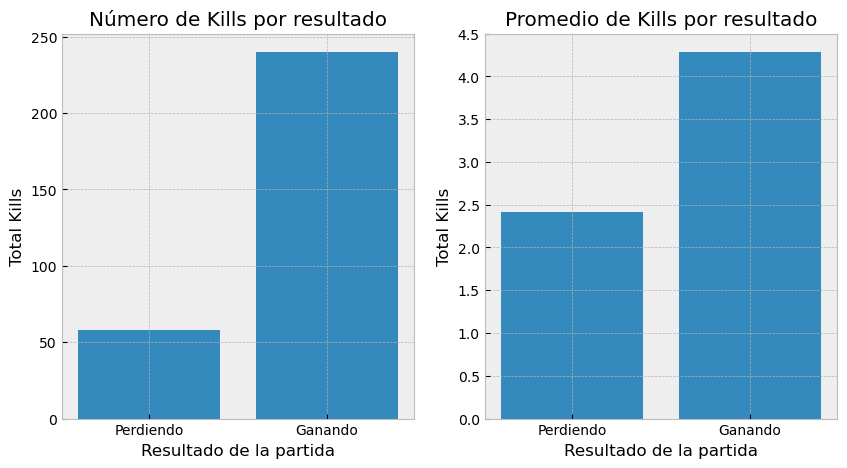

In [8]:
# Filtrar el dataframe dependiendo del resultado
result_0 = df[df['result'] == 0]
result_1 = df[df['result'] == 1]

#Creamos los subplots y fijamos el tamaño
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(['Perdiendo', 'Ganando'], [result_0['kills'].sum(), result_1['kills'].sum()])
ax1.set_xlabel('Resultado de la partida')
ax1.set_ylabel('Total Kills')
ax1.set_title('Número de Kills por resultado')

ax2.bar(['Perdiendo', 'Ganando'], [result_0['kills'].mean(), result_1['kills'].mean()])
ax2.set_xlabel('Resultado de la partida')
ax2.set_ylabel('Total Kills')
ax2.set_title('Promedio de Kills por resultado')
plt.show()

Podriamos hacer un gráfico con los KDA que ha tenido este jugador a lo largo de la temporada

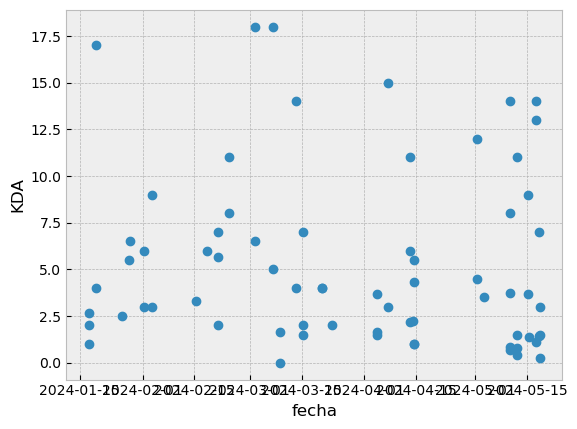

In [42]:
#añadimos la fecha de las partidas
Faker=players.loc['Faker']
df=Faker[['date','kills','deaths','assists','kda']]
df.head()

x=df['date']
y=df['kda']

plt.plot_date(x, y)
plt.xlabel('fecha')
plt.ylabel('KDA')


plt.show()

Tarea 1: Consigue que en el eje x se muestre las fechas por meses para que se vea de forma más comprensible

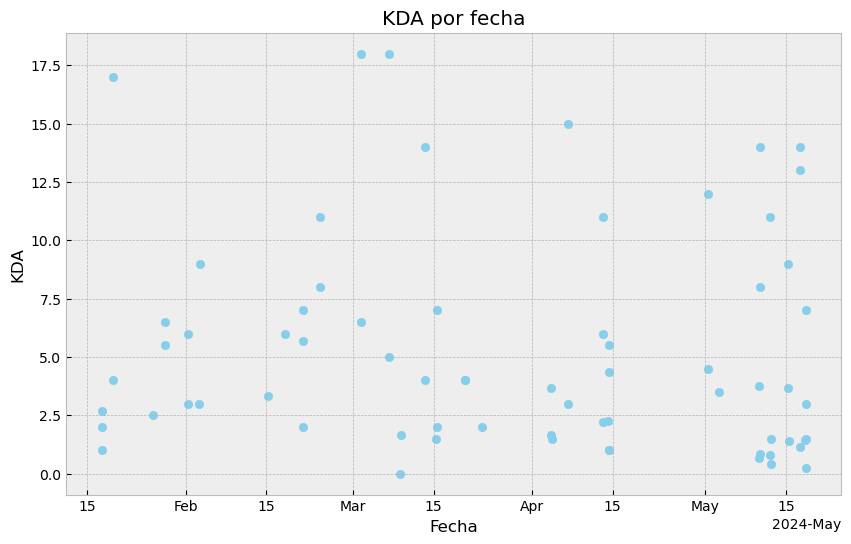

In [44]:
from matplotlib.dates import ConciseDateFormatter
Faker=players.loc['Faker']
# Convertimos al formato de fecha el dataframe
Faker['date'] = pd.to_datetime(Faker['date'])

# Creamos un gráfico de puntos para el KDA y las fechas de las partidas
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Faker['date'], Faker['kda'], color='skyblue')
ax.set_xlabel('Fecha')
ax.set_ylabel('KDA')
ax.set_title('KDA por fecha')

#podemos usar el formateador de fechas de matplotlib, se necesita lacalizar en el eje los ticks donde cambia la etiqueta de valor (en este caso de mes)
date_format = ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(date_format)

plt.show()

Ahora vamos a superponer a otro jugador en el gráfico para hacer una comparación.

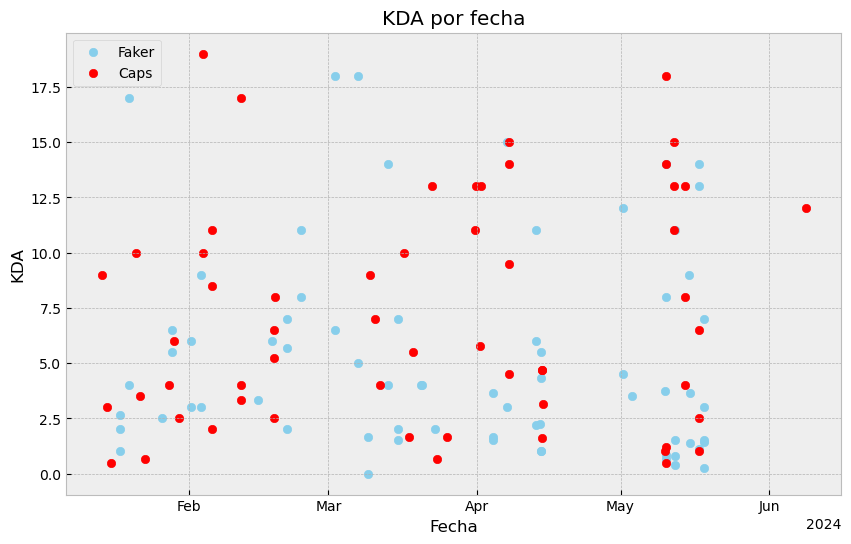

In [48]:
Caps=players.loc['Caps']

# Convertimos al formato de fecha el dataframe
Caps['date'] = pd.to_datetime(Caps['date'])


#Añadimos otro scatter encima con otro color y con la etiqueta del otro jugador
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Faker['date'], Faker['kda'], color='skyblue', label='Faker')
ax.scatter(Caps['date'], Caps['kda'], color='red',label='Caps')
#la leyenda muestra las etiquetas que le hayamos indicado
plt.legend(loc='upper left')

ax.set_xlabel('Fecha')
ax.set_ylabel('KDA')
ax.set_title('KDA por fecha')

#podemos usar el formateador de fechas de matplotlib, se necesita lacalizar en el eje los ticks donde cambia la etiqueta de valor (en este caso de mes)
date_format = ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(date_format)

plt.show()

Vamos a utilizar otra librería de gráficos: seaborn abreviado como sns que está basada en matplotlib y la complementa.
En este caso vamos a contar cuantas veces se ha escogido cada campeón.

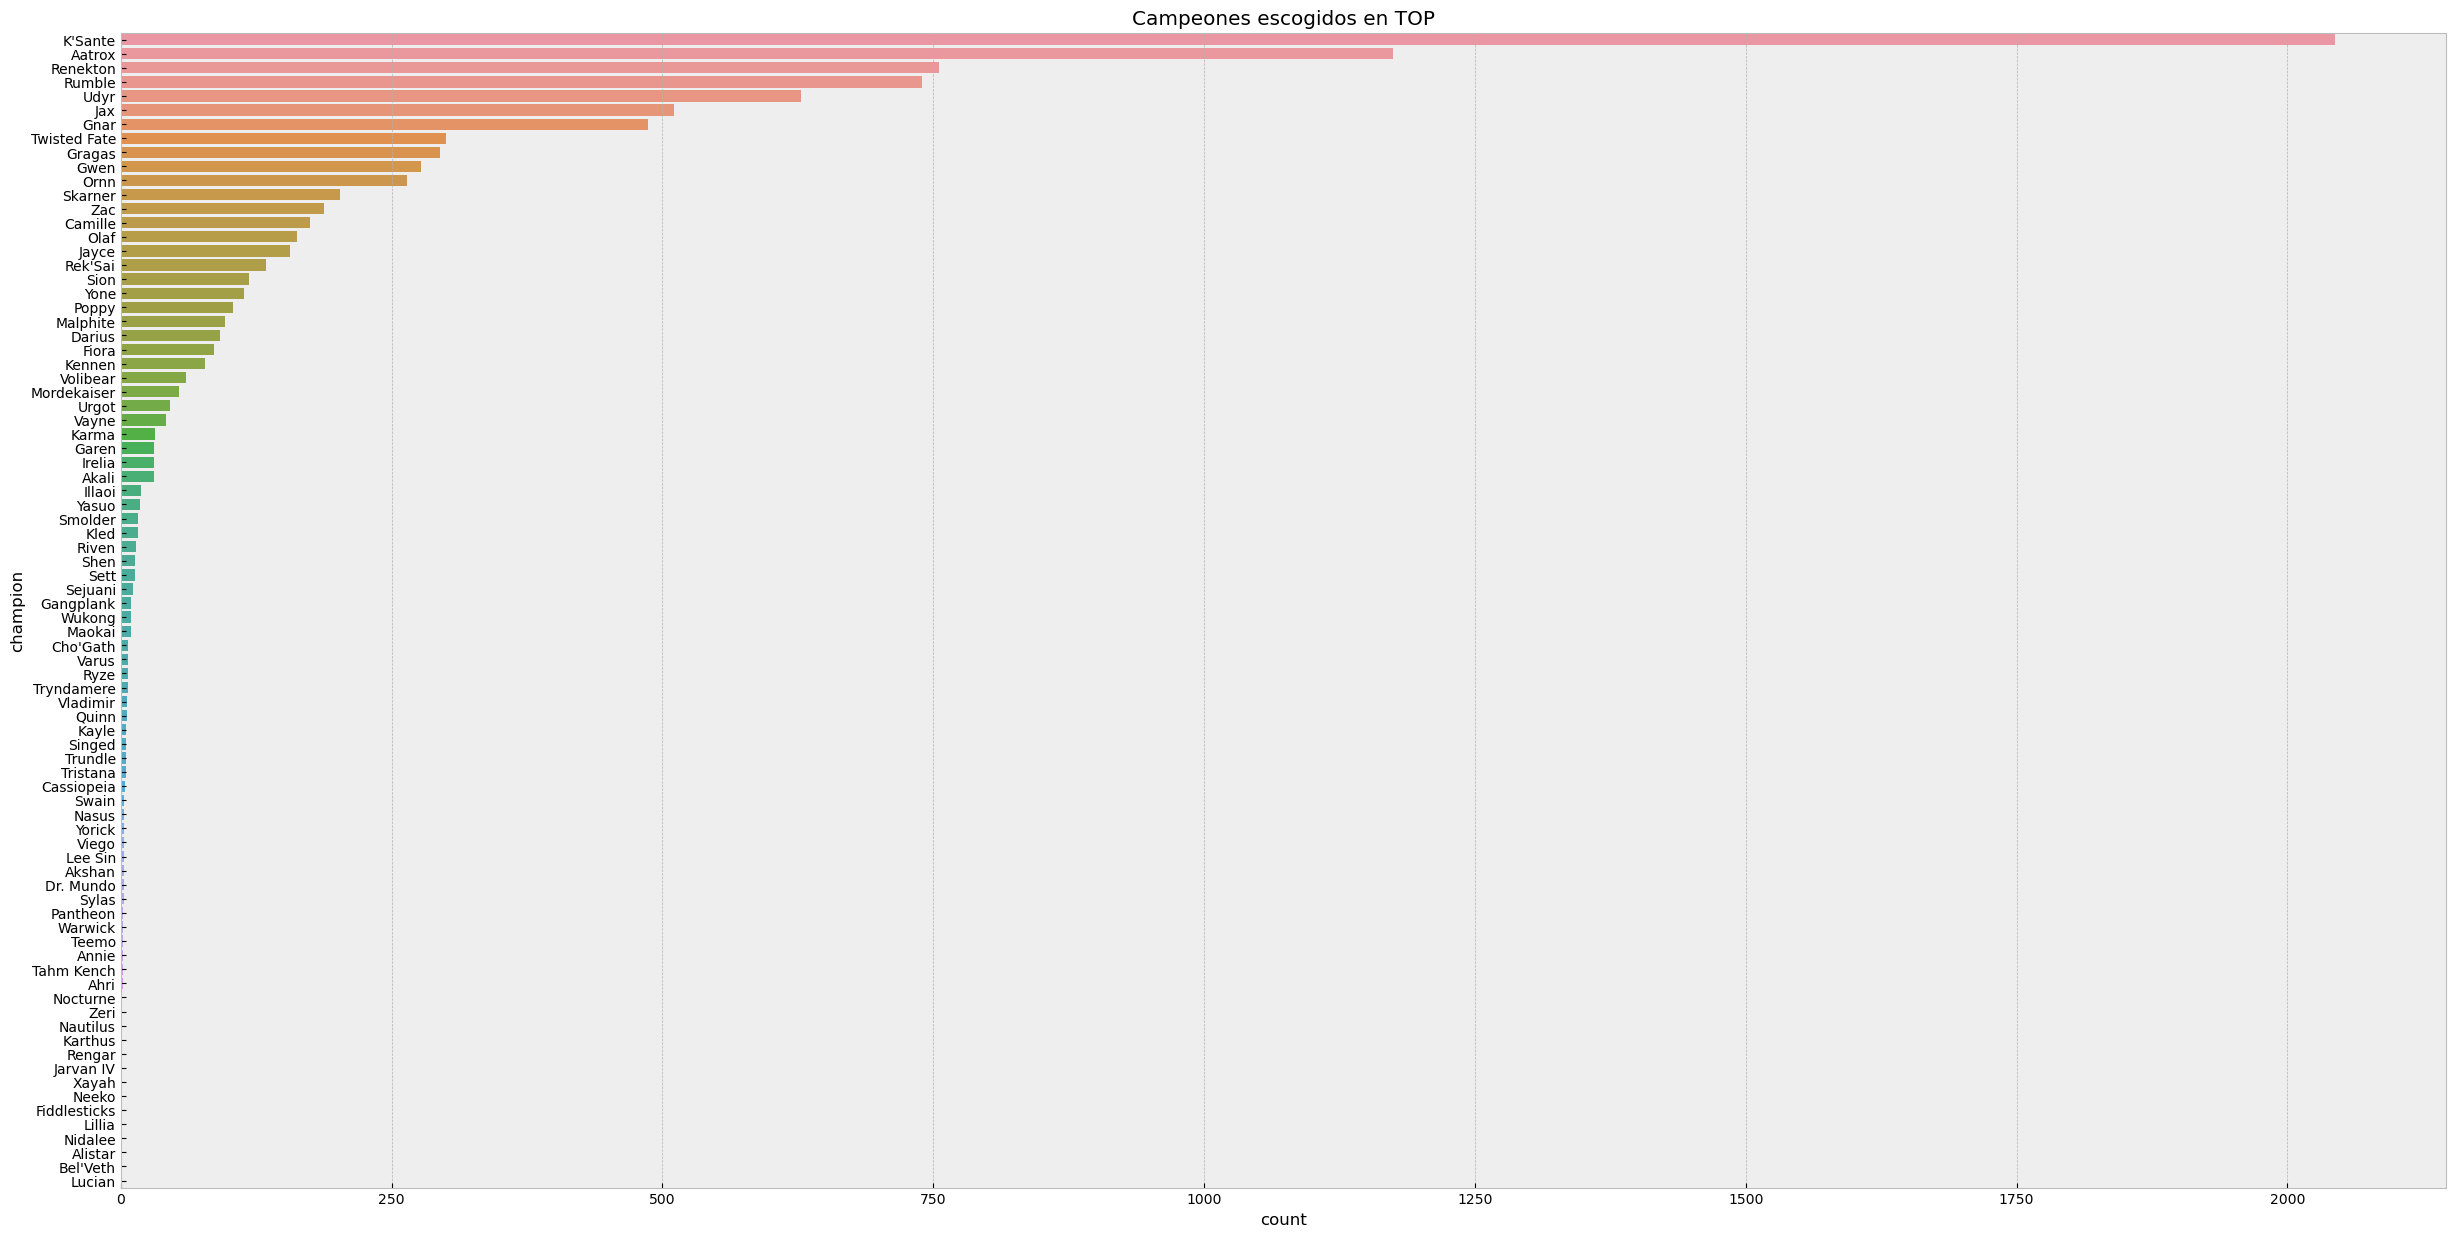

Número distinto de campeones escogidos en TOP : 82


In [52]:
#filtramos por los personajes de top (una de las 5 posiciones del juego)
datos_top= data[(data.position == 'top')]

#vamos a contar cuantas veces aparece después de fijar la variable 'champion' como índice del dataframe
orden_cantidad=datos_top['champion'].value_counts().index

plt.figure(figsize=(30,15))
sns.countplot(y="champion",data=datos_top, order=orden_cantidad)
plt.title('Campeones escogidos en TOP')
plt.show()

print('Número distinto de campeones escogidos en TOP : {}'.format(len(datos_top['champion'].unique())))


Vamos a mirar estadísticas generales como el kda de los jugadores a lo largo de la temporada

In [118]:
kda=data.groupby('playername')[['kda','dpm','total cs']].mean()
pos=data.groupby('playername')[['position','teamname']].first()
stats = pd.concat([kda, pos], axis=1)
stats.sort_values(by='kda', ascending=False, inplace=True)

stats.head(10)

,kda,dpm,total cs,position,teamname
playername,,,,,
Rabelo,15.000000,445.33410,268.000000,bot,RED Academy
rdgap,15.000000,652.03790,210.000000,mid,Tropa Raizen
Skewy,15.000000,745.39620,290.000000,bot,Spectacled Bears
Ecstassy,14.000000,771.30060,274.000000,bot,NORD Esports
Zelt,13.529412,713.69610,288.470588,mid,Fuego
Naros,13.000000,122.33620,30.000000,sup,PÊEK Gaming
Theocacs,13.000000,258.32980,178.000000,jng,Venomcrest Esports
Flare,12.500000,874.40360,307.000000,bot,Ilha das Lendas
Incursio,12.412500,863.63550,220.750000,mid,Antic Esports


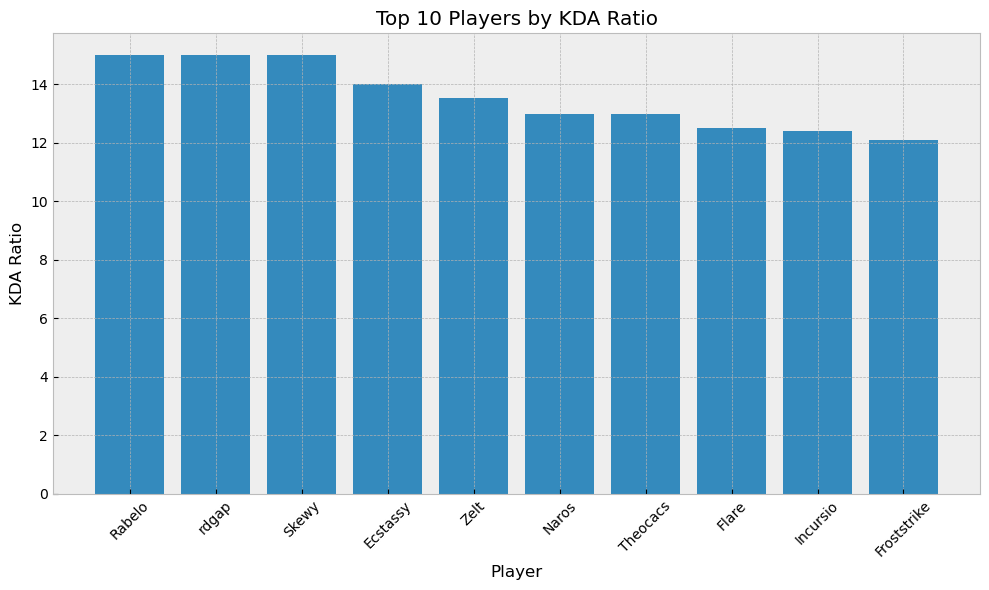

In [120]:
# Assuming 'stats' contains the relevant data
top_10_players = stats.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_players.index, top_10_players['kda'])
plt.xlabel('Player')
plt.ylabel('KDA Ratio')
plt.title('Top 10 Players by KDA Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ahora vamos a hacer lo mismo pero quedandonos con solo las ligas LEC, LCS, LPL y LCK

In [123]:
data['league'].unique()

array(['DCup', 'LEC', 'LCKC', 'LCO', 'UL', 'LLA', 'LCK', 'PRM', 'LVP SL',
       'LFL', 'PCS', 'LJL', 'VCS', 'CBLOL', 'LCS', 'NACL', 'LPL', 'HM',
       'GLL', 'ESLOL', 'NLC', 'TCL', 'LIT', 'LPLOL', 'LDL', 'EBL',
       'CBLOLA', 'AL', 'HC', 'LFL2', 'NEXO', 'LRN', 'LRS', 'EM', 'MSI',
       'LAS'], dtype=object)

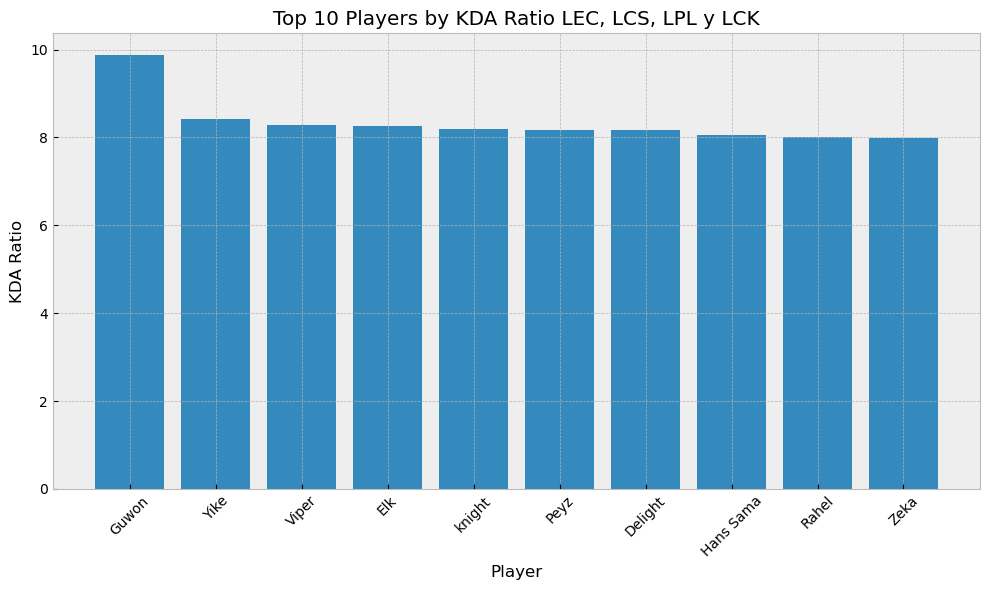

In [130]:
# Suponiendo que tienes un dataframe llamado 'data' con una columna 'league'
# Filtra el dataframe para mantener solo los valores especificados en la columna 'league'
filtered_data = data[data['league'].isin(['LCS', 'LPL', 'LCK', 'LEC'])]

kda=filtered_data.groupby('playername')[['kda','dpm','total cs']].mean()
pos=filtered_data.groupby('playername')[['position','teamname']].first()
stats = pd.concat([kda, pos], axis=1)
stats.sort_values(by='kda', ascending=False, inplace=True)
top_10_players = stats.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_players.index, top_10_players['kda'])
plt.xlabel('Player')
plt.ylabel('KDA Ratio')
plt.title('Top 10 Players by KDA Ratio LEC, LCS, LPL y LCK')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_10_players

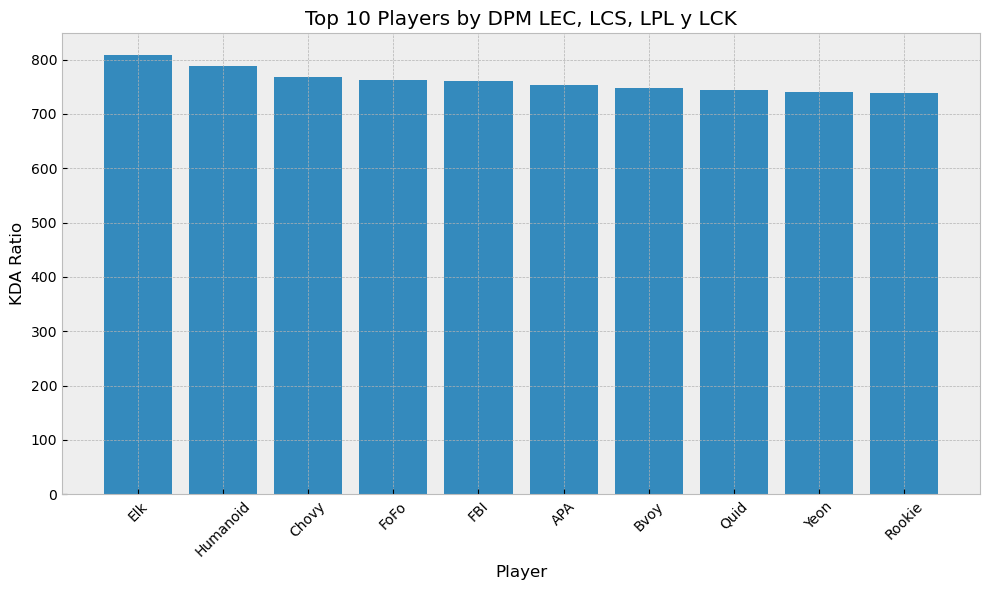

,kda,dpm,total cs,position,teamname
playername,,,,,
Elk,8.270667,807.990558,291.260000,bot,Bilibili Gaming
Humanoid,5.478938,788.034050,282.826923,mid,Fnatic
Chovy,7.307233,767.499755,323.943396,mid,Gen.G
FoFo,5.408170,762.635286,291.196078,mid,Team WE
FBI,6.535088,761.573184,248.736842,bot,NRG
APA,5.815152,753.483279,294.878788,mid,Team Liquid
Bvoy,7.326389,747.930908,299.000000,bot,Shopify Rebellion
Quid,6.127564,743.985623,307.961538,mid,100 Thieves
Yeon,7.285281,739.641479,281.787879,bot,Team Liquid


In [136]:
stats = pd.concat([kda, pos], axis=1)
stats.sort_values(by='dpm', ascending=False, inplace=True)
top_10_players = stats.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_players.index, top_10_players['dpm'])
plt.xlabel('Player')
plt.ylabel('KDA Ratio')
plt.title('Top 10 Players by DPM LEC, LCS, LPL y LCK')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_10_players

Vamos a mirar más estadísticas para saber quienes tienen las mejores estadísticas

In [166]:
num_stats=filtered_data.groupby('position')[['kda','dpm','damageshare','visionscore','total cs']].mean()
#Quitamos team, porqué son estadísticas individuales
num_stats = num_stats.drop('team')
# Cambia el orden del índice para que sea el correcto
num_stats = num_stats.reindex(['top', 'jng', 'mid', 'bot', 'sup'])

num_stats

,kda,dpm,damageshare,visionscore,total cs
position,,,,,
top,4.226159,508.541182,0.221222,35.408596,266.620239
jng,5.337685,322.020287,0.139291,51.862894,192.116975
mid,5.551602,633.678466,0.275588,41.543526,288.457018
bot,5.863317,644.894446,0.277141,51.229053,285.040805
sup,5.177108,199.763221,0.086758,111.711099,54.291621
